### Content-based_Отзывы о продуктах питания и гурманской пище file_path = 'Grocery_and_Gourmet_Food_5

- Рекомендательные системы — это комплекс сервисов и программ, который анализирует предпочтения пользователей и пытается предсказать, что может их заинтересовать. Они помогают клиентам определиться с выбором товара или контента, а также повышают лояльность, конверсию и средний чек интернет-магазинов, предприятий быстрого питания, телекоммуникационных и финансовых организаций.
- Существует два основных типа рекомендательных систем: контентно-ориентированная и коллаборативная фильтрация.
- Контентно-ориентированная фильтрация основана на анализе характеристик товаров и предпочтениях пользователя. Система анализирует содержание товаров, такие как текстовые описания, категории, ключевые слова и т. д., и сопоставляет их с предпочтениями пользователя. На основе этого анализа система предлагает рекомендации, соответствующие интересам пользователя.
- Коллаборативная фильтрация рекомендует продукты как на основе оценок самого покупателя, так и на основе явных и неявных предпочтений других пользователей. Например, если вы купили стиральную машину, то коллаборативная система предложит товары, которыми интересовались другие покупатели стиральных машин, а не машину другого бренда.
- Универсальных методов не существует, и всё чаще применяется гибридный подход, который сочетает методы для получения максимально точных рекомендаций на имеющихся данных и при минимальных затратах времени.

- Скачаем набор данных Amazon, который включает отзывы пользователей о различных продуктах. Данные предоставляются в формате JSON и могут быть использованы для экспериментов и анализа данных.
- "5-core" и "ratings only" относятся к двум разным типам данных, доступных на сайте Amazon Review Data.
- "5-core" относится к подмножеству данных, в котором каждое из оставшихся пользователей и элементов имеет 5 отзывов каждый. Это означает, что если у пользователя было менее 5 отзывов, он был исключен из этого набора данных. Эти данные обычно используются для экспериментов, где требуется большое количество отзывов от каждого пользователя и каждого товара.
- "ratings only" относится к набору данных, который включает только кортежи (item, user, rating, timestamp). 
- Каждый поднабор включает информацию об отзывах пользователей, такую как рейтинг, время отзыва, идентификатор отзывателя и текст отзыва. Это означает, что в этих данных нет метаданных или самих отзывов, они включают только рейтинги. 

Такие данные обычно используются для обучения рекомендательных систем, так как они содержат только необходимые данные для предсказания рейтингов.
- Ура, нужно обучить рекомендательную систему, то "ratings only" может быть более подходящим.

Один из способов использования этих данных - это создание системы рекомендаций. Например, вы можете использовать модель матричного факторизации для предсказания рейтингов на основе только рейтинговых данных. Это может быть особенно полезно для компаний, которые хотят улучшить свои системы рекомендаций и увеличить продажи.

Другой возможный подход - это анализ отзывов для определения общего мнения клиентов о конкретных продуктах или категориях продуктов. Это может помочь компаниям улучшить свои продукты или изменить свою стратегию маркетинга.

### Content-based подход на основе поведения пользователя

#### Импорт библиотек

In [1]:
# Установка ширины контейнера для отображения
from IPython.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

In [2]:
# Импортируем необходимые библиотеки
import pandas as pd # Используется для работы с данными
import seaborn as sns
import matplotlib.pyplot as plt 
import scipy.sparse as sparse # Используется для работы с разреженными матрицами
import numpy as np # Используется для математических операций
from scipy.sparse.linalg import spsolve # Функция для решения систем линейных уравнений

In [4]:
# Импортируем необходимые библиотеки по построению модели
from sklearn.model_selection import train_test_split  # Для разделения данных на обучающую и тестовую выборки
from sklearn.metrics import mean_squared_error  # Для вычисления среднеквадратичной ошибки
from math import sqrt  # Для вычисления квадратного корня
from sklearn.feature_extraction.text import TfidfVectorizer, TfidfTransformer  # Для преобразования текста в векторы TF-IDF
from sklearn.metrics.pairwise import linear_kernel, cosine_similarity  # Для вычисления линейного ядра и косинусного сходства
from sklearn.neighbors import NearestNeighbors  # Для построения модели ближайших соседей

In [5]:
from typing import List, Dict # Импортируем типы List и Dict из модуля typing

In [6]:
# Импорт класса TfidfVectorizer из модуля feature_extraction.text
from sklearn.feature_extraction.text import TfidfVectorizer 

# Импорт функции cosine_similarity из модуля metrics.pairwise
from sklearn.metrics.pairwise import cosine_similarity 

 - Как видно из описания, в этом наборе данных Grocery and Gourmet Food
- Бакалея и еда для гурманов	содержатся Метаданные, такие как текст отзыва или описание товара, включены в набор данных "Office Products" в разделе "5-core". Этот набор данных содержит полные отзывы пользователей, включая текст отзыва, рейтинг, время отзыва и другие детали.
- "Бакалея и еда для гурманов" относится к категории товаров на Amazon, которые включают в себя различные виды продуктов питания и напитков. Эта категория может включать в себя все, от сыра и хлеба до специализированных продуктов питания и напитков.

#### Загружаем датасет

In [7]:
import pandas as pd

# Путь к файлу с отзывами о продуктах питания и гурманской пище
file_path = 'Grocery_and_Gourmet_Food_5.json.gz'  # Замените на актуальный путь к файлу

# Чтение JSON файла по частям с использованием chunksize
chunk_size =  10000  # Размер части данных для чтения за один раз
chunks = []

for chunk in pd.read_json(file_path, lines=True, chunksize=chunk_size):
    chunks.append(chunk)

# Объединение всех частей в один DataFrame
retail_data = pd.concat(chunks, ignore_index=True)

# Вывод первых пяти строк DataFrame
print(retail_data.head())


   overall  verified   reviewTime      reviewerID        asin  \
0        5      True  11 19, 2014  A1QVBUH9E1V6I8  4639725183   
1        5      True  10 13, 2016  A3GEOILWLK86XM  4639725183   
2        5      True  11 21, 2015  A32RD6L701BIGP  4639725183   
3        5      True  08 12, 2015  A2UY1O1FBGKIE6  4639725183   
4        5      True  05 28, 2015  A3QHVBQYDV7Z6U  4639725183   

      reviewerName                                         reviewText  \
0   Jamshed Mathur                                No adverse comment.   
1        itsjustme                          Gift for college student.   
2  Krystal Clifton  If you like strong tea, this is for you. It mi...   
3          U. Kane  Love the tea. The flavor is way better than th...   
4         The Nana  I have searched everywhere until I browsed Ama...   

                         summary  unixReviewTime vote style image  
0                     Five Stars      1416355200  NaN   NaN   NaN  
1                 Great product.  

 - Используем функцию pd.read_json из библиотеки pandas для чтения больших JSON файлов по частям (или "чанкам"), что позволяет обрабатывать данные в удобных порциях, не загружая всё файл в память сразу. Это особенно полезно при работе с большими наборами данных.

## 1. Проводим предпроверочный анализ

In [8]:
# Вывод первых пяти строк данных
retail_data.head()

,overall,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,vote,style,image
0,5,True,"11 19, 2014",A1QVBUH9E1V6I8,4639725183,Jamshed Mathur,No adverse comment.,Five Stars,1416355200,NaN,NaN,NaN
1,5,True,"10 13, 2016",A3GEOILWLK86XM,4639725183,itsjustme,Gift for college student.,Great product.,1476316800,NaN,NaN,NaN
2,5,True,"11 21, 2015",A32RD6L701BIGP,4639725183,Krystal Clifton,"If you like strong tea, this is for you. It mi...",Strong,1448064000,NaN,NaN,NaN
3,5,True,"08 12, 2015",A2UY1O1FBGKIE6,4639725183,U. Kane,Love the tea. The flavor is way better than th...,Great tea,1439337600,NaN,NaN,NaN
4,5,True,"05 28, 2015",A3QHVBQYDV7Z6U,4639725183,The Nana,I have searched everywhere until I browsed Ama...,This is the tea I remembered!,1432771200,NaN,NaN,NaN


- Используем библиотеку pandas для чтения данных из сжатого JSON файла с отзывами о продуктах питания и гурманской пище. 
- ниже представлен перевод на русский язык:
- overall — общий рейтинг товара.
- verified — флаг подтверждения отзыва.
- reviewTime — время отзыва в читаемом формате.
- reviewerID — идентификатор пользователя-автора отзыва.
- asin — идентификатор товара Amazon Standard Identification Number.
- reviewerName — имя пользователя-автора отзыва.
- reviewText — текст отзыва.
- summary — краткое содержание отзыва.
- unixReviewTime — время отзыва в формате Unix timestamp.
- vote — количество полезных голосов для отзыва.
- style — метаданные товара (например, формат, цвет и т.д.).
- image — изображения, добавленные пользователем после получения товара.

In [9]:
# Смотрим на размерность
retail_data.shape

(1143860, 12)

### Препроцессинг

In [10]:
# Анализируем колонку
# Статистика по рейтингам
print(retail_data['overall'].describe())

count    1.143860e+06
mean     4.442209e+00
std      1.063901e+00
min      1.000000e+00
25%      4.000000e+00
50%      5.000000e+00
75%      5.000000e+00
max      5.000000e+00
Name: overall, dtype: float64


In [11]:
# Анализируем колонку
retail_data['summary'].value_counts()

summary
Five Stars                                                                                    231688
Four Stars                                                                                     35910
Three Stars                                                                                    16120
One Star                                                                                        7222
Two Stars                                                                                       6603
                                                                                               ...  
The packaging & presentation is very nice. Makes for good gift for a tea-lover                     1
Ok for total newcomers -- overpriced waste of your money for people that know their stuff.         1
These are pretty good teas                                                                         1
so I have no idea of how it was liked. As far as shipping                          

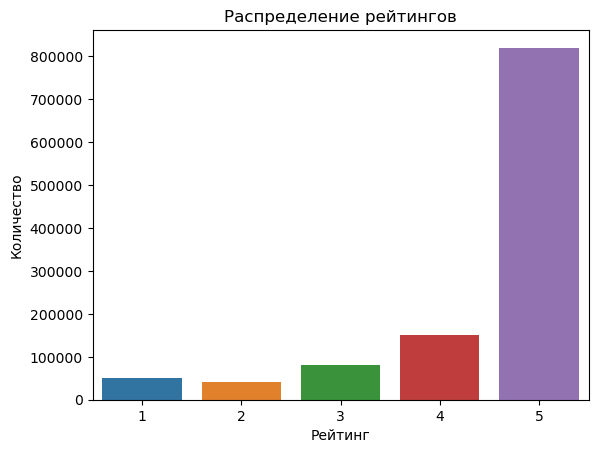

In [12]:
# Распределение рейтингов
sns.countplot(x='overall', data=retail_data)
plt.title('Распределение рейтингов')
plt.xlabel('Рейтинг')
plt.ylabel('Количество')
plt.show()

In [13]:
# Количество уникальных товаров
retail_data['asin'].nunique()

41320

In [14]:
# Работа с пропущенными значениями
retail_data.isnull().sum()

overall                 0
verified                0
reviewTime              0
reviewerID              0
asin                    0
reviewerName          138
reviewText            390
summary               219
unixReviewTime          0
vote               985658
style              551774
image             1134350
dtype: int64

- Используем asin и reviewText для контентной фильтрации.
- Контентная фильтрация — это метод рекомендательных систем, который основан на анализе характеристик товаров и предпочтениях пользователя.
- Система анализирует содержание товаров, такие как текстовые описания, категории, ключевые слова и т. д., и сопоставляет их с предпочтениями пользователя. На основе этого анализа система предлагает рекомендации, соответствующие интересам пользователя.

In [15]:
# Чтение данных из Excel-файла
# retail_data = pd.read_excel('Grocery_and_Gourmet_Food_5.xlsx')

# Удаление строк, где количество равно  0
retail_data = retail_data[retail_data.overall >  0]

# Удаление строк с пропущенными значениями
retail_data = retail_data.dropna()

# Вывод первых пяти строк данных
print(retail_data.head())

     overall  verified   reviewTime      reviewerID        asin  \
393        4      True   05 7, 2016  A2R0EBFJFCNSZM  B00006FWVX   
578        5      True  11 19, 2015  A1QC1C545QHNZG  B00008RCN8   
873        3      True   08 5, 2011   ALJ77PYM7D513  B0000CD02T   
961        5      True  08 13, 2017  A1Q5AHXG0HVV34  B0000CFH7B   
978        4      True  06 16, 2016  A21DSKR8PDX0ZY  B0000CFH7B   

           reviewerName                                         reviewText  \
393               356NV  I love using these colors to dye my white cand...   
578              yalcin  The best price you could ever get, Fresh made ...   
873    Mrs. Mia Wallace  Usually a big fan of Bob's Red Mill products, ...   
961          City Chick  I am writing this based on my use with FROSTIN...   
978  KrystalHagerty1234  Really cool spray.  Be sure that whatever your...   

                                               summary  unixReviewTime  vote  \
393                                Nice, solid c

Видим, что каждая запись в данных включает в себя идентификатор товара, идентификатор пользователя, который оставил отзыв, рейтинг, который он дал, и временную метку отзыва. 

использовать asin для контентной фильтрации, так как это уникальный идентификатор товара, который позволяет сравнивать разные отзывы о одном и том же продукте. Для анализа текста вы можете выбрать столбец reviewText или summary в зависимости от вашей цели. Если вы хотите анализировать более подробные и развернутые мнения клиентов, то лучше использовать reviewText, так как это полный текст отзыва. Если вы хотите анализировать более краткие и сжатые высказывания, то лучше использовать summary, так как это короткое изложение основной мысли отзыва. Оба столбца содержат полезную информацию для анализа текста, но имеют разную длину и степень детализации. Вы можете также комбинировать оба столбца, чтобы получить более полное представление о текстах отзывов

In [16]:
# Вывод первых пяти строк данных
retail_data.head()

,overall,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,vote,style,image
393,4,True,"05 7, 2016",A2R0EBFJFCNSZM,B00006FWVX,356NV,I love using these colors to dye my white cand...,"Nice, solid colors.",1462579200,14.0,{'Color:': ' Primary'},[https://images-na.ssl-images-amazon.com/image...
578,5,True,"11 19, 2015",A1QC1C545QHNZG,B00008RCN8,yalcin,"The best price you could ever get, Fresh made ...","Best Price, Best Quality, Fresh Out of the Box",1447891200,4.0,{'Flavor:': ' Wintermint'},[https://images-na.ssl-images-amazon.com/image...
873,3,True,"08 5, 2011",ALJ77PYM7D513,B0000CD02T,Mrs. Mia Wallace,"Usually a big fan of Bob's Red Mill products, ...",Too grainy for my taste,1312502400,2.0,{'Size:': ' 24 Ounce (Pack of 4)'},[https://images-na.ssl-images-amazon.com/image...
961,5,True,"08 13, 2017",A1Q5AHXG0HVV34,B0000CFH7B,City Chick,I am writing this based on my use with FROSTIN...,"Safe, successful and effective way of coloring...",1502582400,13.0,{'Color:': ' Pearl Color Mist'},[https://images-na.ssl-images-amazon.com/image...
978,4,True,"06 16, 2016",A21DSKR8PDX0ZY,B0000CFH7B,KrystalHagerty1234,Really cool spray. Be sure that whatever your...,Really cool idea,1466035200,7.0,{'Color:': ' Gold'},[https://images-na.ssl-images-amazon.com/image...


В content-based рекоммендательной системе мы будет по купленным товары искать похожие товары, то есть товары с похожим описанием. Для этого созданим таблицу с описаниями товаров.

In [17]:
# Создание таблицы item_lookup с двумя столбцами: asin и reviewText
# Удаление дубликатов по этим столбцам
item_lookup = retail_data[['asin', 'reviewText']].drop_duplicates()

# Преобразование столбца asin в строковый тип данных
# Удаление пропущенных значений в этом столбце
item_lookup['asin'] = item_lookup.asin.astype(str).dropna()

# Преобразование всех символов в столбце reviewText в нижний регистр
item_lookup.reviewText = item_lookup.reviewText.apply(lambda x: x.lower())

# Сброс индексов таблицы
item_lookup = item_lookup.reset_index(drop = True)

# Вывод размера таблицы (количество строк и столбцов)
print(item_lookup.shape)

# Вывод первых пяти строк таблицы
item_lookup.head()


(2940, 2)


,asin,reviewText
0,B00006FWVX,i love using these colors to dye my white cand...
1,B00008RCN8,"the best price you could ever get, fresh made ..."
2,B0000CD02T,"usually a big fan of bob's red mill products, ..."
3,B0000CFH7B,i am writing this based on my use with frostin...
4,B0000CFH7B,really cool spray. be sure that whatever your...


- Представляем тексты в виде векторов, находим по косинусной расстоянию самые близкие тексты
- Предварительная обработка текста: Тексты (например, отзывы или описания товаров) преобразуются в векторы, используя техники, такие как Term Frequency-Inverse Document Frequency (TF-IDF), которые учитывают важность слов в документе относительно остальной коллекции документов.
- Вычисление векторов: Каждому элементу (например, товару или отзыву) присваивается вектор признаков, основанный на его текстовой информации.

## 2. Построение рекомендательной системы

### Контентная фильтрация

Content-based-метод основан на предыдущих покупках пользователя. Будем искать товары с похожим описанием и рекомендовать их пользователю.

Для определения схожести товаров мы можем извлекать важные слова или словосочетания из отзывов и затем, базируясь на этом, составлять систему рекомендаций.

Будем использовать метод TF-IDF (TF — term frequency, IDF — inverse document frequency) для построения системы.


Выполняем TF-IDF и считаем скор для каждого описания товара.

In [18]:
# Импортируем классы TfidfVectorizer и TfidfTransformer из библиотеки sklearn
from sklearn.feature_extraction.text import TfidfVectorizer, TfidfTransformer

# Создаем объект TfidfVectorizer с параметрами:
# analyzer='word' - анализируем текст по словам, а не по символам
# stop_words='english' - исключаем из анализа английские стоп-слова, такие как the, a, an и т. д.
tfidf = TfidfVectorizer(analyzer='word', stop_words='english')

# Преобразовываем столбец reviewText из таблицы item_lookup в матрицу tf-idf
# tf-idf - это мера, которая учитывает частоту слова в документе и обратную частоту слова в коллекции документов
# tf-idf повышает вес редких слов и снижает вес частых слов
tfidf_matrix = tfidf.fit_transform(item_lookup['reviewText'])


Считаем похожесть одного описания на другое, используя косинусовую меру.

In [19]:
# Импортируем функции linear_kernel и cosine_similarity из библиотеки sklearn
from sklearn.metrics.pairwise import linear_kernel, cosine_similarity

# Вычисляем косинусное сходство между векторами tf-idf из матрицы tfidf_matrix
# Косинусное сходство - это мера, которая показывает, насколько близки два вектора по углу между ними
# Косинусное сходство равно 1, если векторы совпадают, 0, если они перпендикулярны, и -1, если они противоположны
cosine_similarities = cosine_similarity(tfidf_matrix)

In [20]:
# Смотрим на размерность
tfidf_matrix.shape

(2940, 14382)

In [21]:
# Создаем пустой словарь similarities
similarities = {}

# Проходим по всем строкам матрицы cosine_similarities
for i in range(len(cosine_similarities)):
    # Сортируем индексы строк по убыванию косинусного сходства
    # Берем только 50 последних индексов, т.е. 50 самых похожих товаров
    similar_indices = cosine_similarities[i].argsort()[:-50:-1]
    
    # Добавляем в словарь similarities пару ключ-значение,
    # где ключ - это значение столбца asin из таблицы item_lookup для текущей строки
    # Значение - это список из 50 кортежей, каждый из которых содержит три элемента: косинусное сходство, 
    # отзывы и код товара для похожего товара
    # Пропускаем первый элемент списка, т.к. это сам товар, для которого ищем похожие
    similarities[item_lookup['asin'].iloc[i]] = [(cosine_similarities[i][x], 
                                                  item_lookup.iloc[x]['reviewText'], 
                                                  item_lookup.iloc[x]['reviewText']) for x in similar_indices][1:]


In [22]:
# Определяем класс ContentBasedRecommender
class ContentBasedRecommender:
    # Определяем конструктор класса, который принимает матрицу сходства между товарами
    def __init__(self, matrix):
        # Сохраняем матрицу сходства в атрибуте matrix_similar
        self.matrix_similar = matrix

    # Определяем вспомогательный метод _print_message, который печатает рекомендованные товары
    def _print_message(self, item, recom_item):
        # Определяем количество рекомендованных товаров
        rec_items = len(recom_item)

        # Печатаем сообщение с количеством рекомендованных товаров
        print(f'The {rec_items} recommended items are:')
        # Проходим по списку рекомендованных товаров
        for i in range(rec_items):
            # Печатаем номер, описание и сходство рекомендованного товара
            print(f"Number {i+1}:")
            print(f"{recom_item[i][1]} with {round(recom_item[i][0], 3)} similarity score")
            # Печатаем разделитель
            print("--------------------")

    # Определяем основной метод recommend, который принимает словарь с параметрами рекомендации и флаг verbose
    def recommend(self, recommendation, verbose = True):
        # Извлекаем товар, для которого нужно дать рекомендации, из словаря recommendation
        item = recommendation['item']
        # Извлекаем количество товаров, которые нужно рекомендовать, из словаря recommendation
        number_items = recommendation['item_number']
        # Извлекаем список похожих товаров из матрицы сходства по ключу item
        # Ограничиваем список по количеству number_items
        recom_item = self.matrix_similar[item][:number_items]
        # Проверяем флаг verbose
        if verbose:
            # Если verbose равен True, то вызываем метод _print_message для печати рекомендаций
            self._print_message(item=item, recom_item=recom_item)
        # Возвращаем список рекомендованных товаров
        return recom_item


In [23]:
# Создаем объект recommedations класса ContentBasedRecommender
# Передаем ему словарь similarities, который содержит похожие товары для каждого товара
recommedations = ContentBasedRecommender(similarities)

- У нас есть возможность выбрать конкретный товар и использовать полученные данные для создания рекомендации. Это может быть основано на анализе исторических данных, текущих настроек пользователя или другим критериям, которые можем  мы определить.
- Предисказание в рекомендательной системе обычно означает прогнозирование того, насколько вероятно, что пользователь оценит товар высоко, или какие товары пользователь, вероятно, заинтересуют на основе его предыдущего поведения или характеристик товара.

In [24]:
# Выбираем одиннадцатую строку из таблицы item_lookup по индексу
# Используем метод iloc, который принимает целочисленный индекс
# Обратите внимание, что индексация начинается с нуля, поэтому одиннадцатая строка имеет индекс 10
item_lookup.iloc[10]

asin                                                 B0000DG86X
reviewText    nice tree for the money. well packaged. no com...
Name: 10, dtype: object

In [25]:
# Задаем индекс товара, для которого хотим получить рекомендации
idx = 10

# Создаем словарь recommendation, который содержит параметры для рекомендательной системы
# Ключ item - это значение столбца asin из таблицы item_lookup для выбранного товара
# Ключ item_number - это количество товаров, которые хотим рекомендовать
recommendation = {
    "item": item_lookup['asin'].iloc[idx],
    "item_number": 5
}

# Печатаем товар, для которого хотим получить рекомендации, и его описание
print('Recommendations for ',item_lookup['asin'].iloc[idx], item_lookup['reviewText'].iloc[idx],':\n\n')

# Вызываем метод recommend объекта recommedations, который создали ранее, и передаем ему словарь recommendation
# Метод recommend возвращает список рекомендованных товаров и печатает их, если флаг verbose равен True
recom_item = recommedations.recommend(recommendation)


Recommendations for  B0000DG86X nice tree for the money. well packaged. no complaints.  we'll i do have one complaint, the fedex man keeps delivering my packages next door. this is my second tree that i've ordered through amazon and i've been pleased with both. will order again. :


The 5 recommended items are:
Number 1:
the base of the tree was thicker than the one shown in the picture.  the i received has a nice taper.  a nice touch, there was a little bit of moss growing over the dirt.

the tree came packaged in a tall box with an inner styrofoam base to protect the pot.  the pot and base of the tree were wrapped tight in a thick plastic and the soil was damp upon arrival.  the rest of the space inside the box was filled with a biodegradable type of foam peanuts (watch out, they get everywhere when you take the tree out).

fantastic tree! with 0.305 similarity score
--------------------
Number 2:
very lovely/healthy tree. i know it looks dead in the pics but it is just dormant, the 

Мы пока не можем сказать, насколько точны эти рекомендации, потому что  не знаем, какие критерии должны использоваться для оценки рекомендательной системы. - Эти рекомендации основаны на контентно-ориентированном подходе, который учитывает сходство текстов отзывов между товарами. 
- Этот подход может дать хорошие результаты, если мы хотим найти товары, которые имеют похожие характеристики или свойства, о которых пишут в отзывах. - Например, если мы ищем деревья, то мы можем получить рекомендации других деревьев, которые имеют похожий вид, размер, уход или качество.
- Однако этот подход может не учитывать другие факторы, такие как рейтинг, цена, доступность или предпочтения пользователя.
- Это уже на будущее, если мы хотим улучшить рекомендательную систему, то мы можем попробовать использовать другие источники данных, такие как метаданные товаров, история покупок или поведение пользователя, или использовать другие методы, такие как коллаборативная фильтрация или гибридные модели.

In [26]:
# Мы можем преобразовать дату из линекс, но возмем уже готовую из датасета
# Импортируем модуль datetime
# import datetime

# Преобразуем unixReviewTime в целое число
# unixReviewTime = int(1462579200)

# Создаем объект datetime из unixReviewTime с помощью метода fromtimestamp
# date = datetime.datetime.fromtimestamp(unixReviewTime)

# Выводим дату в желаемом формате
# print(date.strftime("%d.%m.%Y"))


In [27]:
retail_data.head()

,overall,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,vote,style,image
393,4,True,"05 7, 2016",A2R0EBFJFCNSZM,B00006FWVX,356NV,I love using these colors to dye my white cand...,"Nice, solid colors.",1462579200,14.0,{'Color:': ' Primary'},[https://images-na.ssl-images-amazon.com/image...
578,5,True,"11 19, 2015",A1QC1C545QHNZG,B00008RCN8,yalcin,"The best price you could ever get, Fresh made ...","Best Price, Best Quality, Fresh Out of the Box",1447891200,4.0,{'Flavor:': ' Wintermint'},[https://images-na.ssl-images-amazon.com/image...
873,3,True,"08 5, 2011",ALJ77PYM7D513,B0000CD02T,Mrs. Mia Wallace,"Usually a big fan of Bob's Red Mill products, ...",Too grainy for my taste,1312502400,2.0,{'Size:': ' 24 Ounce (Pack of 4)'},[https://images-na.ssl-images-amazon.com/image...
961,5,True,"08 13, 2017",A1Q5AHXG0HVV34,B0000CFH7B,City Chick,I am writing this based on my use with FROSTIN...,"Safe, successful and effective way of coloring...",1502582400,13.0,{'Color:': ' Pearl Color Mist'},[https://images-na.ssl-images-amazon.com/image...
978,4,True,"06 16, 2016",A21DSKR8PDX0ZY,B0000CFH7B,KrystalHagerty1234,Really cool spray. Be sure that whatever your...,Really cool idea,1466035200,7.0,{'Color:': ' Gold'},[https://images-na.ssl-images-amazon.com/image...


In [28]:
# Посмотрим на отзывы
# retail_data['reviewText'].value_counts()

In [29]:
# Задаем номер клиента, для которого хотим получить данные
customer = 'A21DSKR8PDX0ZY'

# Выбираем данные о розничной торговле, которые соответствуют этому номеру счета, из таблицы retail_data
# Копируем эти данные в новую таблицу cur_customer, чтобы не изменять исходную таблицу
cur_customer = retail_data[retail_data.reviewerID == customer].copy()

# Сортируем данные по столбцу InvoiceDate по возрастанию
cur_customer = cur_customer.sort_values('reviewTime')

# Выводим первые пять строк данных
cur_customer.head()


,overall,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,vote,style,image
141709,5,True,"01 20, 2017",A21DSKR8PDX0ZY,B000MT22QE,KrystalHagerty1234,Great for my project! The color gets darker af...,Great color!,1484870400,2,{'Color:': ' Maroon'},[https://images-na.ssl-images-amazon.com/image...
978,4,True,"06 16, 2016",A21DSKR8PDX0ZY,B0000CFH7B,KrystalHagerty1234,Really cool spray. Be sure that whatever your...,Really cool idea,1466035200,7.0,{'Color:': ' Gold'},[https://images-na.ssl-images-amazon.com/image...
176214,4,True,"07 7, 2016",A21DSKR8PDX0ZY,B000VTBFIG,KrystalHagerty1234,I was expecting something the size of an acryl...,Quite a big bottle!,1467849600,11.0,{'Color:': ' Navy Blue'},[https://images-na.ssl-images-amazon.com/image...
229915,4,True,"07 7, 2016",A21DSKR8PDX0ZY,B000VTBFIG,KrystalHagerty1234,I was expecting something the size of an acryl...,Quite a big bottle!,1467849600,11.0,{'Color:': ' Navy Blue'},[https://images-na.ssl-images-amazon.com/image...
1077626,3,True,"09 17, 2017",A21DSKR8PDX0ZY,B005TKI7NI,KrystalHagerty1234,I have mixed feelings about this product.\nWas...,Mixed feelings,1505606400,2.0,{'Size:': ' 15 oz'},[https://images-na.ssl-images-amazon.com/image...


In [30]:
cur_customer['reviewText'].value_counts()

reviewText
I was expecting something the size of an acrylic paint bottle but to my surprise it's much bigger. So I only gave it 4 out of 5 stars because I still had to use quite a bit of it to get the color I wanted. I used at least 20 drops and it still didn't come out navy. Now I am not a professional baker at this point but I think it also had something to do with the frosting I bought. I know that bakery  buttercream takes colors way better so it may be useful for professionals. I've included a picture of the color I got with 20 drops.                                                                                                                                                                                                                                          2
Great for my project! The color gets darker after a while and for bigger projects (not pictured) I also mixed my buttercream with a little bit of chocolate so I didn't have to use so much dye.                           

- Мы хотим получить рекомендации для товара, который выбрали из данных о продажах.
- Смотри на последний товар. и основываясь на нём делаем рекомендации.

In [31]:
# Создаем словарь recommendation, который содержит параметры для рекомендательной системы
# Ключ item - это код товара, для которого хотим получить рекомендации, который мы извлекаем из последней строки таблицы cur_customer
# Ключ item_number - это количество товаров, которые хотим рекомендовать
recommendation = {
    "item": str(cur_customer.iloc[-1].asin),
    "item_number": 5
}

# Печатаем код и описание отзывов, для которого хотим получить рекомендации, в нижнем регистре
# Используем метод iloc, чтобы выбрать последнюю строку из таблицы cur_customer
# Используем столбцы StockCode и Description, чтобы получить код и описание товара
print('Recommendations for ',cur_customer.iloc[-1].asin, cur_customer.iloc[-1]['asin'].lower(),'\n\n')

# Вызываем метод recommend объекта recommedations, который создали ранее, и передаем ему словарь recommendation
# Метод recommend возвращает список рекомендованных товаров и печатает их, если флаг verbose равен True
recom_item = recommedations.recommend(recommendation)

Recommendations for  B005TKI7NI b005tki7ni 


The 5 recommended items are:
Number 1:
these colors are great, they worked perfectly to color my buttercream and paint my fondant. with 0.275 similarity score
--------------------
Number 2:
red buttercream or any really dark color has always been hard for me to make myself. so when i needed to make a big elmo cake i decided to buy it already made. the color was perfect. i've never had a problem with ck brand buttercreams. with 0.259 similarity score
--------------------
Number 3:
great for my project! the color gets darker after a while and for bigger projects (not pictured) i also mixed my buttercream with a little bit of chocolate so i didn't have to use so much dye. with 0.233 similarity score
--------------------
Number 4:
nice, crusting buttercream for the money.  add a little whipping cream and butter flavoring and it tastes just like a nice, silky, italian buttercream.  it accepts tint beautifully and holds shape very well.  i used t

5 рекомендуемых предметов:
Номер 1:
эти цвета великолепны, они отлично подошли для окраски моего сливочного крема и помадки. с показателем сходства 0,275
--------------------
Номер 2:
красный сливочный крем или любой действительно темный цвет мне всегда было трудно приготовить самому. Поэтому, когда мне нужно было испечь большой торт «Элмо», я решил купить его уже готовым. цвет был идеальным. У меня никогда не было проблем с сливочным кремом марки ck. с показателем сходства 0,259
--------------------
Номер 3:
отлично подходит для моего проекта! через некоторое время цвет становится темнее, и для более крупных проектов (не на фото) я также смешивал сливочный крем с небольшим количеством шоколада, чтобы мне не пришлось использовать так много красителя. с показателем сходства 0,233
--------------------
Номер 4:
хороший, хрустящий сливочный крем за свои деньги. добавьте немного взбитых сливок и ароматизатора сливочного масла, и по вкусу он будет похож на приятный шелковистый итальянский сливочный крем. он прекрасно принимает оттенок и очень хорошо держит форму. Эту глазурь я использовала для тортов на фотографиях. в этом контейнере было достаточно глазури, чтобы заморозить как торты, так и 18 кексов. я был щедр на сумму, которую я использовал. они получили так много комплиментов как по дизайну, так и по вкусу, поэтому я очень рекомендую эту глазурь. с показателем сходства 0,215
--------------------
Номер 5:
поразительнй!! серьезно, это был мой самый первый торт из помадки, и он заставил меня выглядеть профессионалом! с ним очень легко работать после нескольких секунд нагрева в микроволновой печи, как указано на упаковке. это была зима, и она пришла очень тяжелая. имейте в виду, что я 5 лет работал в пекарне, используя сливочный крем, так что я не любитель. но я никогда раньше не работала с мастикой, мне было страшно. ну, уже нет! все были в восторге от красивого праздничного торта моей прекрасной дочери. ох, и еще это было очень вкусно! я один

- Вывод
- Показатель сходства — это мера, которая показывает, насколько близки тексты отзывов между двумя товарами. Чем выше показатель, тем больше совпадений в словах, темах и оценках. Показатель сходства может быть вычислен разными способами, например, с помощью Евклидова расстояния, коэффициента корреляции Пирсона, косинусного сходства или коэффициента Жаккара.
- В нашем случае мы использовали косинусное сходство, которое измеряет угол между двумя векторами, представляющими тексты отзывов. Косинусное сходство может принимать значения от -1 до 1, где -1 означает полное противоположение, 0 означает отсутствие сходства, а 1 означает полное совпадение.
- Например: Показатель сходства 0,215, который указан для товара номер 4 в списке рекомендаций, означает, что тексты отзывов на товар, который мы выбрали, и товар номер 4 имеют некоторые общие слова и темы, но не очень много. 
- Это не очень высокий показатель, но и не очень низкий. Он говорит о том, что эти товары имеют некоторые похожие свойства, но не идентичны. 
- Например, оба товара связаны с сливочным кремом, но имеют разные цвета, ароматы и упаковки. Возможно, если нам понравится товар номер 4, и мы хотим попробовать другой вкус или вид сливочного крема, но если мы ищете что-то очень похожее на наш выбранный товар, то лучше посмотреть на товары с более высоким показателем сходства, например, товар номер 2.

Целевая переменная в контексте машинного обучения обычно относится к тому, что модель пытается предсказать. В случае рекомендательных систем, целевой переменной может быть рейтинг, который пользователь поставил товару, или желаемое поведение пользователя, такое как покупка товара или его добавление в корзину. В вашем случае, если у вас есть рейтинги, которые вы хотите предсказать, они должны быть использованы в качестве целевой переменной для обучения модели.

Однако, в предоставленном вами коде нет явного указания на то, какая переменная является целевой. Если вы хотите построить рекомендательную систему на основе контентной фильтрации, то вам не нужна целевая переменная в том смысле, как это обычно понимается в задачах регрессии или классификации. Вместо этого, вы используете текстовые отзывы для вычисления сходства между товарами и предлагаете товары, которые наиболее похожи на товары, которые пользователь уже оценил высоко.

В контентно-ориентированных рекомендательных системах, таких как те, что вы используете, цель состоит в том, чтобы предложить пользователю товары, которые ему понравятся на основе его предыдущих интересов или поведения. Это достигается путем анализа текстовых данных, таких как отзывы, и вычисления сходства между товарами. В этом контексте, целевая переменная может быть неявной, поскольку она определяется на основе интересов пользователя и предпочтений, а не на основе явно заданных рейтингов.

Таким образом, в вашем случае, если вы хотите построить рекомендательную систему на основе контентной фильтрации, вам не нужно использовать `retail_data` в качестве целевой переменной, так как вы не предсказываете рейтинги. Вместо этого, вы используете `item_lookup` для создания матрицы сходства, которая затем используется для рекомендации товаров на основе текстовых отзывов [1].

## 3. Разделение данных на обучающую и тестовую выборки

In [32]:
from sklearn.model_selection import train_test_split

# Задаем процент данных, который хотим занулить
test_size = 0.2

# Разделяем данные на обучающую и тестовую выборки
train_data, test_data = train_test_split(retail_data, test_size=test_size, random_state=42)

# Зануляем рейтинги в обучающей выборке
train_data = train_data.copy()
train_data.loc[:, 'overall'] = 0


## 4. Оценка качества рекомендаций

In [33]:
from sklearn.metrics import mean_squared_error
from math import sqrt

# Получаем рекомендации для тестовой выборки
test_data['predicted_rating'] = test_data['asin'].apply(lambda x: recommedations.recommend({"item": x, "item_number": 1}, verbose=False)[0][0] if x in recommedations.matrix_similar else 0)

# Вычисляем RMSE
rmse = sqrt(mean_squared_error(test_data['overall'], test_data['predicted_rating']))
print(f'Test RMSE: {rmse:.4f}')


Test RMSE: 4.0168


- Вывод:
- В результате тестирования модели рекомендательной системы было получено значение среднеквадратичной ошибки (RMSE) равное 4.0168. Это значение представляет собой среднее отклонение между реальными и предсказанными рейтингами.
- Среднеквадратичная ошибка (RMSE) является стандартной метрикой для оценки качества моделей регрессии, включая рекомендательные системы. Она измеряет стандартное отклонение ошибок модели: то есть, насколько в среднем прогнозы модели отклоняются от истинных значений.
- В нашем случае, рейтинги варьируются от 0 до 5. Значение RMSE 4.0168 указывает на то, что прогнозы модели в среднем отклоняются от истинных значений на 4.0168 единиц рейтинга. Учитывая диапазон рейтингов от 0 до 5, это довольно высокое значение RMSE, что указывает на низкую точность модели.
- Это может быть связано с различными факторами, такими как сложность данных, выбор модели или метода обучения, и т.д. Возможно, потребуется дополнительная настройка модели или использование других подходов для улучшения точности прогнозов.
- Важно отметить, что RMSE является агрегированной метрикой, и она может не полностью отражать качество рекомендаций для всех пользователей. Например, модель может давать очень точные прогнозы для некоторых пользователей, но очень неточные - для других, и RMSE будет усреднять эти ошибки. Поэтому всегда полезно использовать дополнительные метрики для оценки качества рекомендательной системы.
- Также стоит учесть, что оптимальное значение RMSE зависит от конкретной задачи и данных. В некоторых случаях, даже модели с высоким RMSE могут быть полезны, если они способны выявить неочевидные или контринтуитивные взаимосвязи в данных.
- В целом, значение RMSE 4.0168 указывает на то, что есть потенциал для улучшения модели рекомендательной системы.

- Данный подход — это контентно-ориентированная рекомендательная система, которая учитывает сходство текстов отзывов между товарами. 

### Преимущества:
* Мы можем учитывать предпочтения пользователя, основываясь на его истории покупок и отзывах.
* Мы можем давать персонализированные рекомендации, которые соответствуют интересам и потребностям пользователя.
* Мы можем частично решать проблему холодного старта, когда у нас нет достаточно данных о новых пользователях или товарах, используя контент товаров, такой как описание, категория, метаданные и т.д.

### Недостатки:
* Мы можем быть навязчивыми, если мы даем слишком много или неуместных рекомендаций, которые могут раздражать или отпугивать пользователя.
* Мы можем упускать из вида другие факторы, которые влияют на выбор пользователя, такие как цена, доступность, рейтинг, отзывы других пользователей и т.д.
* Мы можем снижать разнообразие рекомендаций, если мы сосредотачиваемся только на похожих товарах, и не предлагаем новые или неожиданные товары, которые могут заинтересовать пользователя.

Спасибо за внимание!